## Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
cardio_data_train = pd.read_csv("cardio-train.csv", sep = ";")
cardio_data_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [3]:
print("Number of features in the cardio data: ",len(cardio_data_train.columns))
print("Features: ")
print("-"*10)
features_desc_from_kaggle = ["id","Age(days)", "Gender","Height(cm)", "Weight(kg)", "Systolic blood pressure", \
 "Diastolic blood pressure", "Cholesterol", "Glucose", "Smoking" ,\
 "Alcohol intake", "Physical activity", "Presence(1) or absence(0) of cardiovascular disease (Target Variable)"]


for i in range(len(cardio_data_train.columns)):
    print(cardio_data_train.columns[i]+" -----> "+features_desc_from_kaggle[i])

Number of features in the cardio data:  13
Features: 
----------
id -----> id
age -----> Age(days)
gender -----> Gender
height -----> Height(cm)
weight -----> Weight(kg)
ap_hi -----> Systolic blood pressure
ap_lo -----> Diastolic blood pressure
cholesterol -----> Cholesterol
gluc -----> Glucose
smoke -----> Smoking
alco -----> Alcohol intake
active -----> Physical activity
cardio -----> Presence(1) or absence(0) of cardiovascular disease (Target Variable)


#### 1. Identify the dataset columns into nominal, categorical, continues etc. categories

- **Nominal (Categorical) features** : gender, cholesterol, gluc, smoke, alco, active
- **Numeric (Continuous) Features** : age, height, weight, ap_hi, ap_lo
- **Target variable** : cardio

#### 2. Use dataframe.info and dataframe.describe to get the insights about the data.

In [4]:
cardio_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          335 non-null    float64
 2   gender       329 non-null    object 
 3   height       198 non-null    float64
 4   weight       336 non-null    float64
 5   ap_hi        347 non-null    float64
 6   ap_lo        332 non-null    float64
 7   cholesterol  333 non-null    object 
 8   gluc         333 non-null    object 
 9   smoke        326 non-null    float64
 10  alco         335 non-null    float64
 11  active       343 non-null    float64
 12  cardio       500 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


**Observations:**
- We can see presence of NaN(missing) values in all columns except 'id' and 'cardio'.
- Most NaN values are in 'height' column. as non-null count is very low.
- Float values are present in 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', and 'active'. These columns are numeric and continuous. Int values are present in 'id' and 'cardio' columns.
- For columns 'gender', 'cholesterol' and 'gluc' we see data type as object because these are categorical features with string values.

In [5]:
cardio_data_train.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


**Observations:**
- In the output of describe function, we can see basic stats like min, max, 25%, 50%, 75%, mean and std values for numerical columns in our dataset.
- Count represents number of present(non-null) values in each column.
- We can see that range of each column is very different.  i.e. 'age' has very high values compared to 'active' or 'smoke' (0/1 values). We can guess that 'age' is given in days. 'ap_lo' has max value which is very high compared to other values of same column, which suggests presence of outlier(s). 

#### 3. Find the number of null values for each columns

In [6]:
for col in cardio_data_train.columns:
    print("number of null values in column " + col + ":", cardio_data_train[col].isnull().sum())

number of null values in column id: 0
number of null values in column age: 165
number of null values in column gender: 171
number of null values in column height: 302
number of null values in column weight: 164
number of null values in column ap_hi: 153
number of null values in column ap_lo: 168
number of null values in column cholesterol: 167
number of null values in column gluc: 167
number of null values in column smoke: 174
number of null values in column alco: 165
number of null values in column active: 157
number of null values in column cardio: 0


#### 4. Know about the patients (Example of analysis for ages)

In [7]:
#age is given in days, we can convert it to years by age = age/365
cardio_data_train['age'] = (cardio_data_train['age']/365).round()
data_age = (cardio_data_train['age']/365).round().describe()
print("a. Oldest person in the data is : %0.1f years" % data_age['max'])
print("b. Youngest person in the data is : %0.1f years" % data_age['min'])
print("c. Average age of a person in the data is : %0.1f years" % data_age['mean'])
print("d. Median age of a person in the data is : %0.1f years" % data_age['50%'])

a. Oldest person in the data is : 0.0 years
b. Youngest person in the data is : 0.0 years
c. Average age of a person in the data is : 0.0 years
d. Median age of a person in the data is : 0.0 years


#### e. Find the relationship between the cardio and ages (the cardio column is your prediction variable)

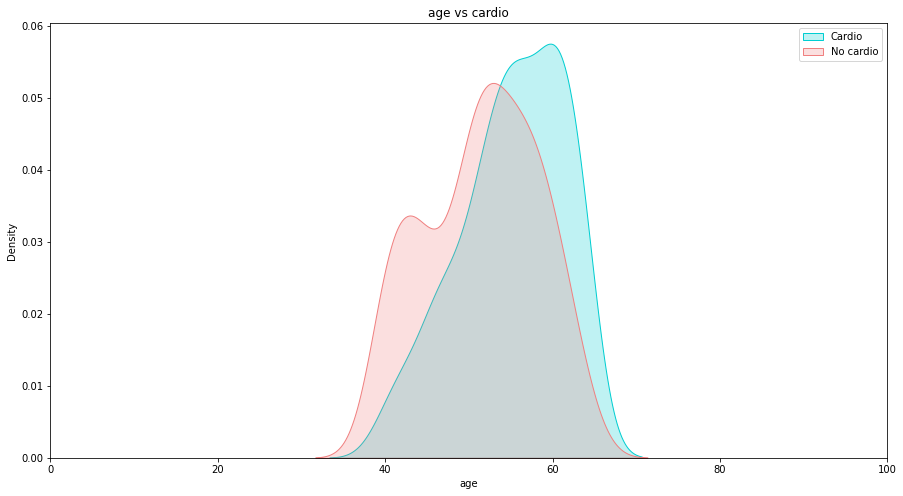

In [8]:
plt.figure(figsize = (15,8))
age_non_null = cardio_data_train[cardio_data_train.age.notnull()]
sns.kdeplot(
    data = age_non_null.loc[(age_non_null['cardio'] == 1), 'age'],
    color = 'darkturquoise',
    shade = True
)
sns.kdeplot(
    data = age_non_null.loc[(age_non_null['cardio'] == 0), 'age'],
    color = 'lightcoral',
    shade = True
)
plt.legend(['Cardio', 'No cardio'])
plt.title('age vs cardio')
plt.xlim(0, 100)
plt.show()

**Observation:**
- As we can see from the density plot, age density distribution of people with cardio disease is on the right side of density distribution of people with no cardio disease. 
- This suggests that people with higher age(>55) have more risk for cardio disease than people with lesser age(<45).

#### f. Find the age groups whose survival rate is the largest

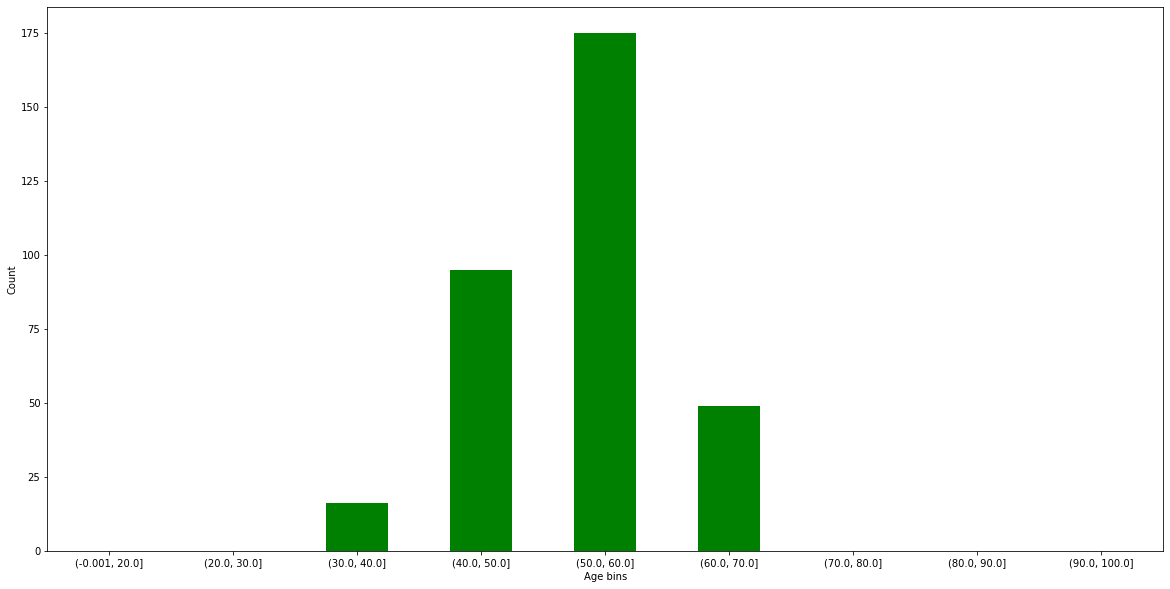

In [9]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
out = pd.cut(
age_non_null.age,
    bins = bins,
    include_lowest = True
)
ax = out.value_counts(sort = False).plot.bar(
    rot = 0,
    color = 'g',
    figsize = (20, 10)
)
plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

**Observations:**
- 

In [10]:
print("cholesterol unique values: ", cardio_data_train["cholesterol"].unique())
print("glucose unique values: ", cardio_data_train["gluc"].unique())
print("gender unique values: ", cardio_data_train["gender"].unique())

cholesterol unique values:  [nan 'Normal' 'High' 'Above Normal']
glucose unique values:  ['Normal' nan 'High' 'Above Normal']
gender unique values:  [nan 'Men' 'Women']


In [11]:
#High=2, Above Normal=1, Normal=0
def replace012(x):
    if x == "High":
        return 2
    elif x == "Above Normal":
        return 1
    elif x =="Normal":
        return 0

cardio_data_train["cholesterol"] = cardio_data_train["cholesterol"].apply(replace012)
cardio_data_train["gluc"] = cardio_data_train["gluc"].apply(replace012)

In [12]:
#Women=0, Men=1
def replace01(x):
    if x == "Women":
        return 0
    elif x == "Men":
        return 1
cardio_data_train["gender"] = cardio_data_train["gender"].apply(replace01)

In [13]:
cardio_data_train.drop("id", axis=1, inplace=True)
cardio_data_train["age"] = (cardio_data_train["age"]/365).round()

In [14]:
cardio_data_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.0,NaN,163.0,75.0,120.0,NaN,NaN,0.0,0.0,0.0,1.0,0
1,0.0,1.0,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,0.0,NaN,170.0,75.0,120.0,NaN,NaN,0.0,0.0,0.0,1.0,1
3,0.0,1.0,NaN,89.0,NaN,80.0,0.0,NaN,0.0,NaN,NaN,0
4,NaN,NaN,158.0,74.0,NaN,93.0,2.0,NaN,0.0,1.0,1.0,1


In [15]:
cardio_data_train.isna().sum()

age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def test_logistic_regression_model(data):
    scalar = MinMaxScaler()
    y = data.loc[:,"cardio"]
    X = data.drop("cardio",1)
    X = scalar.fit_transform(X)
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    clf = LogisticRegression()
    clf.fit(x_train,y_train)

    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)

    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    f1 = f1_score(y_test,y_pred_test)
    return accuracy_train, accuracy_test, f1


In [17]:
orig_cardio_data_train = cardio_data_train.copy()

In [18]:
drop_na_data_train = orig_cardio_data_train.copy().dropna()

accuracy_train, accuracy_test, f1 = test_logistic_regression_model(drop_na_data_train)

print("Train Accuracy after dropping rows with NaN values: ",accuracy_train)
print("Test Accuracy after dropping rows with NaN values: ",accuracy_test)
print("f1 score after dropping rows with NaN values: ",f1)

Train Accuracy after dropping rows with NaN values:  1.0
Test Accuracy after dropping rows with NaN values:  0.5
f1 score after dropping rows with NaN values:  0.0


In [19]:
mean_na_data_train = orig_cardio_data_train.copy()
for x in mean_na_data_train.columns:
    mean_column = np.nanmean(mean_na_data_train[x].values)
    mean_na_data_train[x].replace(np.nan, mean_column, inplace=True)
    
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(mean_na_data_train)

print("Train Accuracy after replacing NaN with mean: ",accuracy_train)
print("Test Accuracy after replacing NaN with mean: ",accuracy_test)
print("f1 score after replacing NaN with mean: ",f1)

Train Accuracy after replacing NaN with mean:  0.6725
Test Accuracy after replacing NaN with mean:  0.69
f1 score after replacing NaN with mean:  0.686868686868687


## Applying the model

In [20]:
train_data = pd.read_csv("cardio-train.csv", sep=";")
print(train_data.shape)
train_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [21]:
validation_data = pd.read_csv("cardio-validation.csv", sep=",")
print(validation_data.shape)
validation_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17934,18936.0,Men,165.0,60.0,NaN,80.0,Normal,NaN,0.0,0.0,1.0,1
1,52450,17987.0,NaN,NaN,58.8,120.0,90.0,Normal,Normal,NaN,0.0,1.0,0
2,37653,NaN,NaN,159.0,93.0,130.0,90.0,High,Normal,0.0,0.0,NaN,1
3,96970,22851.0,Women,172.0,NaN,NaN,100.0,Normal,Normal,0.0,0.0,1.0,1
4,50977,NaN,Women,NaN,116.0,NaN,80.0,High,NaN,NaN,NaN,1.0,1


In [22]:
train_data.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
train_data.isna().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [24]:
train_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [25]:
mean_cols = ['age', 'height', 'weight', 'ap_hi']
median_cols = ['ap_lo']
mode_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# outlier_cols = ['height', 'weight', 'ap_lo']
outlier_cols = []

In [26]:
def preprocess(data):
    data.drop("id", axis=1, inplace=True, errors='ignore')
    data["cholesterol"] = data["cholesterol"].apply(replace012)
    data["gluc"] = data["gluc"].apply(replace012)
    data["gender"] = data["gender"].apply(replace01)
    data["age"] = (data["age"]/365).round()
    
    for col in mean_cols:
        mean_column = np.nanmean(data[col].values)
        data[col].replace(np.nan, mean_column, inplace=True)
    for col in median_cols:
        median_column = np.nanmedian(data[col].values)
        data[col].replace(np.nan, median_column, inplace=True)
    for col in mode_cols:
        mode_column, _ = stats.mode(data[col])
        data[col].replace(np.nan, mode_column[0], inplace=True)
    
    for col in outlier_cols:
        low = data[col].quantile(0.10)
        high = data[col].quantile(0.90)
        med = data[col].quantile(0.50)
        data[col] = np.where(data[col] < low, med, data[col])
        data[col] = np.where(data[col] > high, med, data[col])
        
    return data


In [27]:
train_data = preprocess(train_data)
validation_data = preprocess(validation_data)

In [28]:
train_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.00000,1.0,163.000000,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,0
1,44.00000,1.0,168.000000,68.0,110.000000,70.0,0.0,0.0,0.0,0.0,1.0,0
2,54.00000,1.0,170.000000,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,1
3,52.00000,1.0,163.934343,89.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
4,53.38806,1.0,158.000000,74.0,128.685879,93.0,2.0,0.0,0.0,1.0,1.0,1


In [29]:
validation_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,52.000000,1.0,165.000000,60.000000,126.406736,80.0,0.0,0.0,0.0,0.0,1.0,1
1,49.000000,1.0,164.639706,58.800000,120.000000,90.0,0.0,0.0,0.0,0.0,1.0,0
2,53.046392,1.0,159.000000,93.000000,130.000000,90.0,2.0,0.0,0.0,0.0,1.0,1
3,63.000000,0.0,172.000000,73.778316,126.406736,100.0,0.0,0.0,0.0,0.0,1.0,1
4,53.046392,0.0,164.639706,116.000000,126.406736,80.0,2.0,0.0,0.0,0.0,1.0,1


In [30]:
train_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [31]:
validation_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [32]:
train_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,53.388060,0.786000,163.934343,74.347321,128.685879,86.680000,0.26400,0.132000,0.060000,0.044000,0.872000,0.502000
std,5.523053,0.410538,5.189041,11.746245,15.396741,71.339079,0.60252,0.450535,0.237725,0.205301,0.334424,0.500497
min,39.000000,0.000000,120.000000,45.000000,12.000000,60.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,1.000000,163.934343,69.000000,120.000000,80.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,53.388060,1.000000,163.934343,74.347321,128.685879,80.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,56.000000,1.000000,163.934343,78.000000,130.000000,80.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,187.000000,155.000000,190.000000,1000.000000,2.00000,2.000000,1.000000,1.000000,1.000000,1.000000


age
45.0
60.0
gender
0.0
1.0
height
159.9
168.0
weight
60.900000000000006
88.0
ap_hi
110.0
150.0
ap_lo
80.0
90.0
cholesterol
0.0
1.0
gluc
0.0
0.0
smoke
0.0
0.0
alco
0.0
0.0
active
0.0
1.0
cardio
0.0
1.0


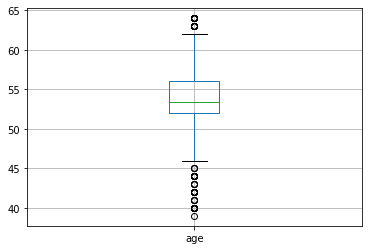

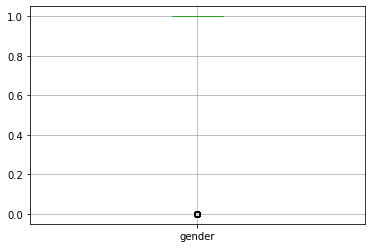

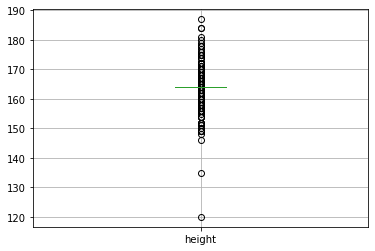

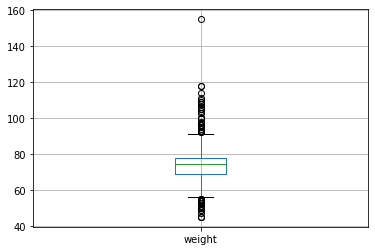

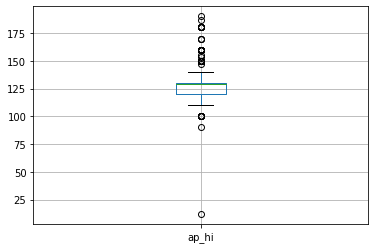

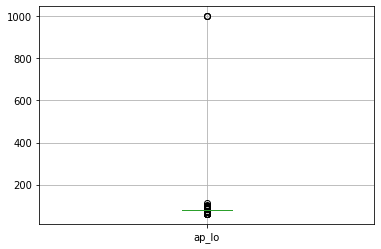

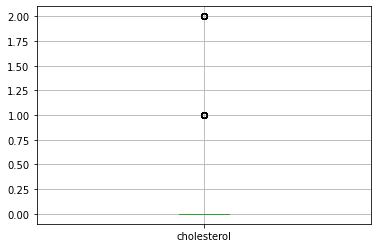

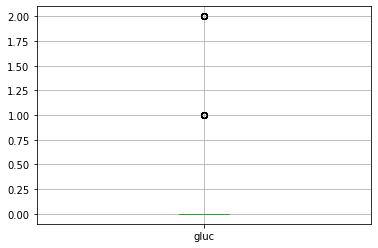

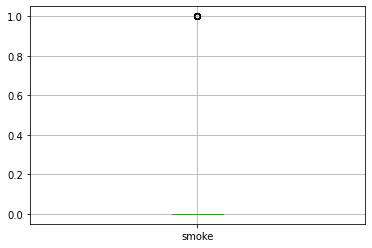

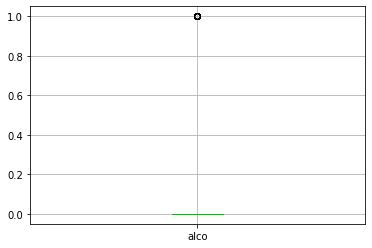

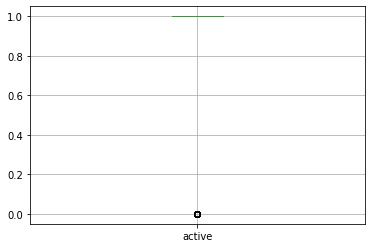

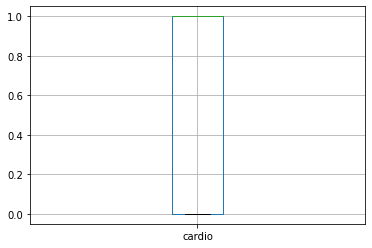

In [33]:
for col in train_data.columns:
    plt.figure()
    train_data.boxplot([col])
    print(col)
    print(train_data[col].quantile(0.10))
    print(train_data[col].quantile(0.90))

In [34]:
total_train_data = train_data.append(validation_data)
y = total_train_data.loc[:,"cardio"]
X = total_train_data.drop("cardio", 1)

scalar = MinMaxScaler()
X = scalar.fit_transform(X)


In [35]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [50]:
clf_log_reg = LogisticRegression()
clf_log_reg.fit(x_train,y_train)

y_pred_test = clf_log_reg.predict(x_test)
y_pred_train = clf_log_reg.predict(x_train)

print("Train Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test,y_pred_test))
print("f1 score: ",f1_score(y_test,y_pred_test))

# kagggle score=0.68000 (Mean Replacement + Logistic Regression)
# kagggle score=0.65600 (Mean+Mode Replacement + Logistic Regression)
# kagggle score=0.65600 (Mean+Mode+Median+Outlier+Scaling + Logistic Regression)

Train Accuracy:  0.71125
Test Accuracy:  0.715
f1 score:  0.7046632124352332


In [37]:
c_values = [100, 10, 1.0, 0.1, 0.01]
for c in c_values:
    clf = LogisticRegression(C = c)
    clf.fit(x_train,y_train)
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    print("c = ", c)
    print("Train Accuracy: ", accuracy_score(y_train,y_pred_train))
    print("Test Accuracy: ", accuracy_score(y_test,y_pred_test))
    print("f1 score: ",f1_score(y_test,y_pred_test))

c =  100
Train Accuracy:  0.72375
Test Accuracy:  0.69
f1 score:  0.6702127659574467
c =  10
Train Accuracy:  0.7175
Test Accuracy:  0.695
f1 score:  0.6737967914438503
c =  1.0
Train Accuracy:  0.71125
Test Accuracy:  0.715
f1 score:  0.7046632124352332
c =  0.1
Train Accuracy:  0.6725
Test Accuracy:  0.675
f1 score:  0.6596858638743456
c =  0.01
Train Accuracy:  0.63375
Test Accuracy:  0.61
f1 score:  0.5185185185185185


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from tqdm import tqdm
estimators = [100,200,400]
max_depth = range(5,12)
min_samples_split = range(2,11)

for i in estimators:
    for j in max_depth:
        for k in min_samples_split:
            rf_basic = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j, min_samples_split=k, n_jobs=-1, random_state=1)
            rf_basic.fit(x_train,y_train)
            y_pred_basic_rf = rf_basic.predict(x_test)
            rmse = mean_squared_error(y_test,y_pred_basic_rf,squared=False)
            f1 = f1_score(y_test,y_pred_basic_rf)
            if rmse < 0.50 or f1 > 0.70:
                print("for n_estimators =", i,"and max depth = ", j," min_samples_split: ",k)
                print("rmse=", rmse, "f1 score=", f1)

for n_estimators = 100 and max depth =  6  min_samples_split:  4
rmse= 0.5196152422706632 f1 score= 0.7096774193548386
for n_estimators = 100 and max depth =  6  min_samples_split:  6
rmse= 0.5244044240850758 f1 score= 0.7027027027027027
for n_estimators = 100 and max depth =  7  min_samples_split:  3
rmse= 0.5244044240850758 f1 score= 0.7027027027027027
for n_estimators = 100 and max depth =  7  min_samples_split:  6
rmse= 0.5244044240850758 f1 score= 0.7027027027027027
for n_estimators = 100 and max depth =  7  min_samples_split:  9
rmse= 0.5196152422706632 f1 score= 0.7065217391304347
for n_estimators = 100 and max depth =  7  min_samples_split:  10
rmse= 0.5244044240850758 f1 score= 0.7027027027027027
for n_estimators = 100 and max depth =  8  min_samples_split:  4
rmse= 0.5244044240850758 f1 score= 0.7027027027027027
for n_estimators = 100 and max depth =  9  min_samples_split:  3
rmse= 0.5244044240850758 f1 score= 0.7058823529411765
for n_estimators = 100 and max depth =  9  min_

for n_estimators = 400 and max depth =  11  min_samples_split:  4
rmse= 0.51478150704935 f1 score= 0.7195767195767195
for n_estimators = 400 and max depth =  11  min_samples_split:  5
rmse= 0.5244044240850758 f1 score= 0.7058823529411765
for n_estimators = 400 and max depth =  11  min_samples_split:  6
rmse= 0.5196152422706632 f1 score= 0.7127659574468085
for n_estimators = 400 and max depth =  11  min_samples_split:  7
rmse= 0.5244044240850758 f1 score= 0.7058823529411765
for n_estimators = 400 and max depth =  11  min_samples_split:  8
rmse= 0.5196152422706632 f1 score= 0.7127659574468085


In [74]:
rf_basic = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=11,min_samples_split=10,n_jobs=-1)
rf_basic.fit(x_train,y_train)
y_pred_basic_rf = rf_basic.predict(x_test)
rmse = mean_squared_error(y_test,y_pred_basic_rf,squared=False)
f1 = f1_score(y_test,y_pred_basic_rf)
print("rmse score: ",rmse, ", f1 score=", f1)

# kagggle score=0.70400 (Mean+Mode+Median+Outlier+Scaling + RF(200,11,10))

rmse score:  0.5196152422706632 f1 score= 0.7127659574468085


In [97]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
c_values = [10**x for x in range(-6,5)]
kernel = ['poly', 'rbf', 'sigmoid','linear']
# gamma = [1,0.1,0.01,0.001]
gamma = ['auto']
f1_score_val = []
for k in kernel:
    for c in c_values:
        for g in gamma:
            svc_basic_all = SVC(C=c, kernel=k)
            svc_basic_all.fit(x_train,y_train)
            y_pred_svc_basic_all = svc_basic_all.predict(x_test)
            f1 = f1_score(y_test,y_pred_svc_basic_all)
            f1_score_val.append(f1)
            if f1 > 0.70:
                print("kernel=", k, ", C=", c, ", gamma=", g)
                print("f1 score: ",f1)

kernel= poly , C= 10 , gamma= auto
f1 score:  0.7191011235955057
kernel= rbf , C= 100 , gamma= auto
f1 score:  0.7071823204419891
kernel= rbf , C= 10000 , gamma= auto
f1 score:  0.7015706806282723


In [53]:
from sklearn.metrics import classification_report
svc_basic_all = SVC(C=10, kernel='poly')
svc_basic_all.fit(x_train,y_train)
y_pred_svc_basic_all = svc_basic_all.predict(x_test)
print(classification_report(y_test,y_pred_svc_basic_all))
print("f1 score: ", f1_score(y_test,y_pred_svc_basic_all))
print("rmse: ",mean_squared_error(y_test,y_pred_svc_basic_all,squared=False))

# kagggle score=0.68800 (Mean+Mode+Median+Outlier+Scaling + SVC(c=10))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       101
           1       0.81      0.65      0.72        99

    accuracy                           0.75       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200

f1 score:  0.7191011235955057
rmse:  0.5


In [69]:
alpha = [5, 11, 15, 21, 31, 41, 51, 56, 99]
f1_score_val = []
from sklearn.neighbors import KNeighborsClassifier
for i in alpha:
    knn_basic = KNeighborsClassifier(n_neighbors=i, weights="distance")
    knn_basic.fit(x_train,y_train)
    y_pred_knn_basic = knn_basic.predict(x_test)
    f1 = f1_score(y_test,y_pred_knn_basic)
    f1_score_val.append(f1)
    print("C = ",i)
    print("f1 score: ",f1)

C =  5
f1 score:  0.5970149253731343
C =  11
f1 score:  0.6349206349206349
C =  15
f1 score:  0.6276595744680851
C =  21
f1 score:  0.6387434554973822
C =  31
f1 score:  0.6373626373626373
C =  41
f1 score:  0.6373626373626373
C =  51
f1 score:  0.6153846153846153
C =  56
f1 score:  0.611111111111111
C =  99
f1 score:  0.6057142857142856


In [54]:
test_data = pd.read_csv("cardio-test.csv", sep=",")
print(test_data.shape)
test_data.head()

(250, 12)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,47997,20222,Men,156,57.0,110,70,Normal,Normal,0,1,0
1,15311,18079,Men,160,60.0,120,80,Normal,Normal,0,0,1
2,44269,20279,Women,170,80.0,140,69,Normal,Normal,0,0,1
3,91373,23227,Men,158,80.0,160,90,High,Normal,0,0,1
4,9686,20461,Men,158,92.0,140,90,Normal,Above Normal,0,0,0


In [55]:
test_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [56]:
# test_data = preprocess(test_data)
test_data.drop("id", axis=1, inplace=True, errors='ignore')
test_data["cholesterol"] = test_data["cholesterol"].apply(replace012)
test_data["gluc"] = test_data["gluc"].apply(replace012)
test_data["gender"] = test_data["gender"].apply(replace01)

In [57]:
scalar = MinMaxScaler()
test_data = scalar.fit_transform(test_data)

In [75]:
# REPLACE CLF
y_pred_submission = rf_basic.predict(test_data)
df_result = pd.DataFrame(y_pred_submission,columns=["cardio"])
sample = pd.read_csv("sample-submission.csv")
df_result_final = pd.concat([sample.loc[:,"id"],df_result], axis=1)
df_result_final.to_csv("submissions/mean-mode-median-scaling-rf.csv", index=False)